## PREDICTING PULSARS
### In this notebook, I used the Deep Neural Network to identify Pulsars from the given dataset. 
- The dataset can be obtained from Kaggle at https://www.kaggle.com/pavanraj159/predicting-a-pulsar-star.

The data set describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey .

Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter .

As pulsars rotate, their emission beam sweeps across the sky, and when this crosses our line of sight, produces a detectable pattern of broadband radio emission. As pulsars rotate rapidly, this pattern repeats periodically. Thus pulsar search involves looking for periodic radio signals with large radio telescopes.

Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation . Thus a potential signal detection known as a 'candidate', is averaged over many rotations of the pulsar, as determined by the length of an observation. In the absence of additional info, each candidate could potentially describe a real pulsar. However in practice almost all detections are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find.

Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted, which treat the candidate data sets as binary classification problems. Here the legitimate pulsar examples are a minority positive class, and spurious examples the majority negative class.

The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. These examples have all been checked by human annotators.

Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive).



### 1. Packages

Let's first import all the packages that you will need during this assignment. 
- dnn_utils & DeepNN provides the necessary functions to implement our Deep Neural Network

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from dnn_utils import *
from DeepNN import *
from PIL import Image

warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Attribute Information

Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency . The remaining four variables are similarly obtained from the DM-SNR curve . These are summarised below:

- Mean of the integrated profile.
- Standard deviation of the integrated profile.
- Excess kurtosis of the integrated profile.
- Skewness of the integrated profile.
- Mean of the DM-SNR curve.
- Standard deviation of the DM-SNR curve.
- Excess kurtosis of the DM-SNR curve.
- Skewness of the DM-SNR curve.
- Class

Summary 17,898 total examples. 1,639 positive examples. 16,259 negative examples.

### 2. Dataset


In [5]:
data = pd.read_csv('pulsar_stars.csv')
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


### 3. Data Exploration

#### 3.1 Data Dimensions

In [13]:
print("Number of rows: %i" %(data.shape[0]))
print("Number of columns: %i" %(data.shape[1]))

Number of rows: 17898
Number of columns: 9


#### 3.2 Data Information

In [14]:
print("data info: ", data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB
('data info: ', None)


#### 3.3 Missing values

In [16]:
print (data.isnull().sum())

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64


#### 3.4 Renaming Columns

In [17]:
data = data.rename(columns={' Mean of the integrated profile':"mean_profile",
       ' Standard deviation of the integrated profile':"std_profile",
       ' Excess kurtosis of the integrated profile':"kurtosis_profile",
       ' Skewness of the integrated profile':"skewness_profile", 
        ' Mean of the DM-SNR curve':"mean_dmsnr_curve",
       ' Standard deviation of the DM-SNR curve':"std_dmsnr_curve",
       ' Excess kurtosis of the DM-SNR curve':"kurtosis_dmsnr_curve",
       ' Skewness of the DM-SNR curve':"skewness_dmsnr_curve",
       })

In [18]:
data.head()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr_curve,std_dmsnr_curve,kurtosis_dmsnr_curve,skewness_dmsnr_curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


#### 3.5 Data Summary

In [19]:
data.describe()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr_curve,std_dmsnr_curve,kurtosis_dmsnr_curve,skewness_dmsnr_curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


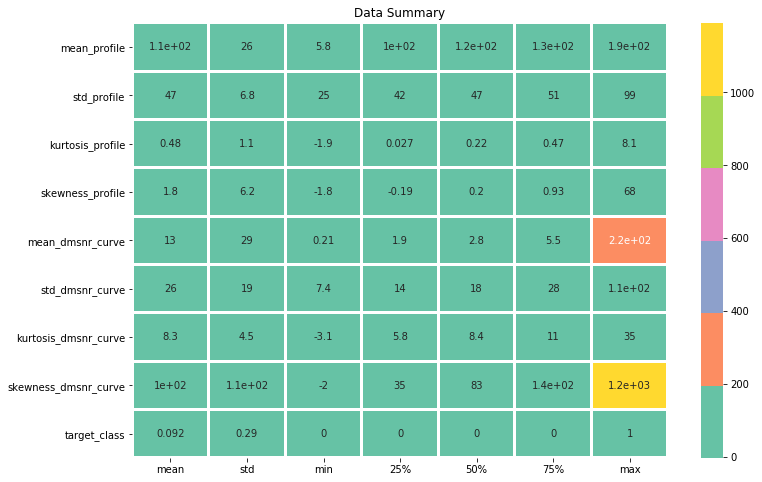

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.describe()[1:].T,
            annot = True, 
            linecolor = 'w',
            linewidth = 2, 
            cmap = sns.color_palette("Set2"))

plt.title('Data Summary')
plt.show()

#### 3.6 Correlation between variables

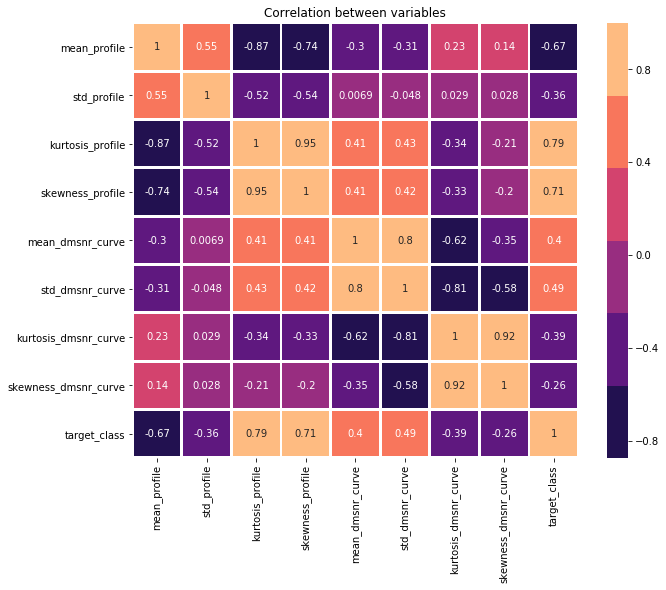

In [43]:
correlation = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, 
            annot = True, 
            linewidth = 2,
            cmap = sns.color_palette('magma'),
            edgecolor = 'k')

plt.title('Correlation between variables')
plt.show()

#### 3.7 Proportion of target variable in dataset

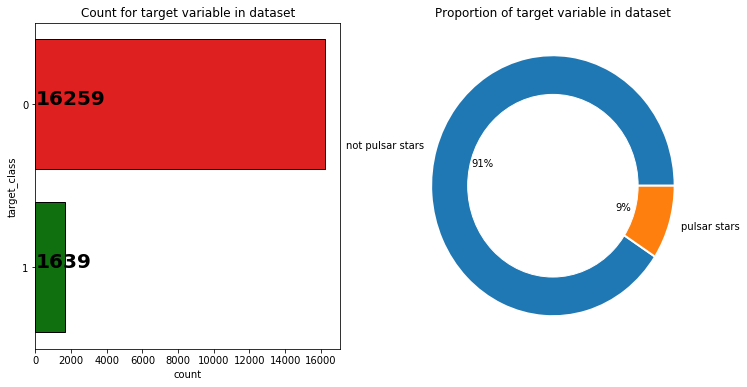

In [119]:
plt.figure(figsize = (12, 6))
plt.subplot(121)
ax = sns.countplot(y = data['target_class'],
             palette = ['r', 'g'],
             linewidth = 1,
             edgecolor = 'k'*2)

for i, j in enumerate(data['target_class'].value_counts().values):
    ax.text(0.7, i, j, fontsize = 20, weight = 'bold')
plt.title('Count for target variable in dataset')


plt.subplot(122)
plt.pie(data['target_class'].value_counts().values,
       labels = ['not pulsar stars', 'pulsar stars'],
       autopct = "%1.0f%%", wedgeprops={"linewidth":2, "edgecolor":"white"})
my_circ = plt.Circle((0, 0), .7, color = 'white')
plt.gca().add_artist(my_circ)
plt.subplots_adjust(wspace = .2)
plt.title("Proportion of target variable in dataset")
plt.show()